<a href="https://colab.research.google.com/github/silverballz/LULU-ISLAND/blob/main/Final_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Udemy Course Enrollment Analysis

This dataset includes courses from Udemy. Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses. Nowadays, the demand for online courses and digital learning are rising. And, more number of students, teachers, and even professionals are learning from online course platforms, like Udemy, Coursera and et cetera.

So, to understand the course enrollment in Udemy platform, this data analysis is performed.

### Importing the necessary packages

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv("/content/drive/MyDrive/udemy_courses.csv")

In [82]:
df.shape

(98104, 13)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98104 entries, 0 to 98103
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   98104 non-null  int64  
 1   title                98104 non-null  object 
 2   url                  98104 non-null  object 
 3   is_paid              98104 non-null  bool   
 4   instructor_names     98102 non-null  object 
 5   category             98104 non-null  object 
 6   headline             98104 non-null  object 
 7   num_subscribers      98104 non-null  int64  
 8   rating               98104 non-null  float64
 9   num_reviews          98104 non-null  int64  
 10  instructional_level  98104 non-null  object 
 11  objectives           98104 non-null  object 
 12  curriculum           98104 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 9.1+ MB


In [84]:
df.drop(["id","url","is_paid","headline","objectives","curriculum"],axis="columns")

,title,instructor_names,category,num_subscribers,rating,num_reviews,instructional_level
0,The Complete Python Bootcamp From Zero to Hero...,"Jose Portilla, Pierian Training",Development,1976866,4.576494,521219,All Levels
1,The Complete 2024 Web Development Bootcamp,"Dr. Angela Yu, Developer and Lead Instructor",Development,1362586,4.679065,409793,All Levels
2,100 Days of Code: The Complete Python Pro Boot...,"Dr. Angela Yu, Developer and Lead Instructor",Development,1417942,4.698768,331803,All Levels
3,The Web Developer Bootcamp 2024,Colt Steele,Development,923815,4.673450,276723,All Levels
4,React - The Complete Guide 2024 (incl. Next.js...,"Academind by Maximilian Schwarzmüller, Maximil...",Development,909848,4.638643,220051,All Levels
...,...,...,...,...,...,...,...
98099,LinkedIn Career Success Starter for High Schoo...,Barbara Rozgonyi,Teaching & Academics,60,4.256361,4,Beginner Level
98100,2 Minute French Whisperer Advanced - Course 4 ...,Christian Aubert,Teaching & Academics,117,5.000000,4,Intermediate Level
98101,Introduction to Biology of Aging,Dr. Gabriele Morabito,Teaching & Academics,6,5.000000,4,All Levels
98102,Mastering Schematics Electrical Drawings Episo...,Elite Engineering,Teaching & Academics,49,4.088524,4,Intermediate Level


In [85]:
df.sort_values("num_subscribers",ascending=False)

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ..."
37069,793796,Microsoft Excel - Excel from Beginner to Advanced,https://www.udemy.com/course/microsoft-excel-2...,True,"Kyle Pew, Office Newb",Office Productivity,Excel with this A-Z Microsoft Excel Course. Mi...,1539236,4.659021,460721,All Levels,Master Microsoft Excel from Beginner to Advanc...,"Microsoft Excel 101 Course Introduction, Ask Q..."
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ..."
12,543600,Automate the Boring Stuff with Python Programming,https://www.udemy.com/course/automate/,True,Al Sweigart,Development,A practical programming course for office work...,1134900,4.626117,114542,All Levels,Automate tasks on their computer by writing si...,"Python Basics, Get Python Installed, Just a ch..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73159,6231189,Introduction to Gouache Landscape Painting,https://www.udemy.com/course/introduction-to-g...,True,Nahid Aamina,Lifestyle,"Learn to paint in Gouache, Get to know the bas...",0,0.000000,0,Intermediate Level,"What Is Gouache, and How Does It Differ from W...","Introduction, Introduction to the Course!, All..."
65302,5640210,How to go viral on TikTok,https://www.udemy.com/course/how-to-go-viral-o...,True,Laura Dirtu,Marketing,viral on social media,0,0.000000,0,All Levels,Understand the TikTok algorithm Discover trend...,"Introduction, Introduction, Strategie, 10% ru..."
73157,5254848,Life In A Mini Course worth Everything!,https://www.udemy.com/course/life-in-a-mini-co...,True,Abdullah King,Lifestyle,"Joy, Peace, Calmness, Perspective, Understandi...",0,0.000000,0,Expert Level,Watching Course BEFORE the Payments will cause...,Welcome to the Course! ONCE WATCHED WITHOUTBUY...
73156,6137903,Morning Seascape: Paint Watercolor Sky and Sea...,https://www.udemy.com/course/morning-seascape-...,True,Aleksandryna Gromyko,Lifestyle,Painting Watercolor Gradient Sunrise Sky using...,0,0.000000,0,All Levels,Learn how to paint smooth watercolor sky with ...,"Introduction, Introduction, Art Materials and ..."


In [88]:
df_udemy=df.head(98104)

In [89]:
df_udemy.shape

(98104, 13)

In [90]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98104 entries, 0 to 98103
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   98104 non-null  int64  
 1   title                98104 non-null  object 
 2   url                  98104 non-null  object 
 3   is_paid              98104 non-null  bool   
 4   instructor_names     98102 non-null  object 
 5   category             98104 non-null  object 
 6   headline             98104 non-null  object 
 7   num_subscribers      98104 non-null  int64  
 8   rating               98104 non-null  float64
 9   num_reviews          98104 non-null  int64  
 10  instructional_level  98104 non-null  object 
 11  objectives           98104 non-null  object 
 12  curriculum           98104 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 9.1+ MB


In [91]:
df_udemy.head()

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ..."
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ..."
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...
3,625204,The Web Developer Bootcamp 2024,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,Development,10 Hours of React just added. Become a Develop...,923815,4.673450,276723,All Levels,"The ins and outs of HTML5, CSS3, and Modern Ja...","Course Orientation, Welcome To The Course!, Jo..."
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,https://www.udemy.com/course/react-the-complet...,True,"Academind by Maximilian Schwarzmüller, Maximil...",Development,Dive in and learn React.js from scratch! Learn...,909848,4.638643,220051,All Levels,Learn React from the ground up and finish the ...,"Getting Started, Welcome To The Course!, What ..."


In [93]:
df_udemy.drop(["url","is_paid","headline","objectives","curriculum"],axis="columns")

,id,title,instructor_names,category,num_subscribers,rating,num_reviews,instructional_level
0,567828,The Complete Python Bootcamp From Zero to Hero...,"Jose Portilla, Pierian Training",Development,1976866,4.576494,521219,All Levels
1,1565838,The Complete 2024 Web Development Bootcamp,"Dr. Angela Yu, Developer and Lead Instructor",Development,1362586,4.679065,409793,All Levels
2,2776760,100 Days of Code: The Complete Python Pro Boot...,"Dr. Angela Yu, Developer and Lead Instructor",Development,1417942,4.698768,331803,All Levels
3,625204,The Web Developer Bootcamp 2024,Colt Steele,Development,923815,4.673450,276723,All Levels
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,"Academind by Maximilian Schwarzmüller, Maximil...",Development,909848,4.638643,220051,All Levels
...,...,...,...,...,...,...,...,...
98099,115328,LinkedIn Career Success Starter for High Schoo...,Barbara Rozgonyi,Teaching & Academics,60,4.256361,4,Beginner Level
98100,3789828,2 Minute French Whisperer Advanced - Course 4 ...,Christian Aubert,Teaching & Academics,117,5.000000,4,Intermediate Level
98101,6043978,Introduction to Biology of Aging,Dr. Gabriele Morabito,Teaching & Academics,6,5.000000,4,All Levels
98102,5525778,Mastering Schematics Electrical Drawings Episo...,Elite Engineering,Teaching & Academics,49,4.088524,4,Intermediate Level


In [94]:
df_udemy.isnull().sum()

,0
id,0
title,0
url,0
is_paid,0
instructor_names,2
category,0
headline,0
num_subscribers,0
rating,0
num_reviews,0


## 1. Which course overall has the maximum number of enrollments?

In [95]:
overall_max_enrolled_course = df_udemy['num_subscribers'].max()
overall_max_enrolled_course

1976866

In [96]:
df_udemy[df_udemy['num_subscribers']==overall_max_enrolled_course]

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ..."


##### From the analysis, it is clear that "The Complete Python Bootcamp From Zero to Hero" is the highly enrolled course with 1976866 subscribers in Udemy.

## 2. Which courses overall has the minimum subscribers/ minimum number of enrollment?

In [97]:
overall_min_enrolled_courses = df_udemy['num_subscribers'].min()
df_min = df_udemy[df_udemy['num_subscribers']==overall_min_enrolled_courses]
df_min

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
25086,6239105,Components of Insurance,https://www.udemy.com/course/components-of-ins...,True,Jeremia Mnayi,Finance & Accounting,"Evaluating Insurance: Premiums, Deductibles.",0,4.9,2,Intermediate Level,Understand the Basic Components of an Insuranc...,"Practice Tests, Deductibles, Policy limits"
25397,5412100,ULTRA Stock Trading Strategy 1 - a Must Know &...,https://www.udemy.com/course/ultra-stock-tradi...,True,Trader ULTRA,Finance & Accounting,Learn a Stock Trading Strategy that You Can Us...,0,1.0,1,All Levels,Those who want to master fundamental trading s...,"Introduction, Introduction to the ULTRA Stock ..."
25645,6009150,Cryptocurrency and Blockchain Essentials,https://www.udemy.com/course/cryptocurrency-an...,True,Stephen Whittaker,Finance & Accounting,Cryptocurrency and Blockchain Essentials: From...,0,0.0,0,Beginner Level,Understand the fundamental concepts and underl...,"Introduction, Introduction, Module 1: Introdu..."
25647,6038048,Cryptocurrency Fundamentals Certification,https://www.udemy.com/course/cryptocurrency-fu...,True,The Business Academy,Finance & Accounting,Learn how cryptocurrencies work in an efficien...,0,0.0,0,Beginner Level,Gain an understanding of the historical defini...,"Introduction, Introduction, What is Money?, Wh..."
25648,6243355,"Life Insurance 101: Understanding Coverage, Costs",https://www.udemy.com/course/life-insurance-10...,True,Jeremia Mnayi,Finance & Accounting,Unlocking the Fundamentals of Life Insurance f...,0,0.0,0,Intermediate Level,Identify Key Life Insurance Concepts Evaluate ...,"Practice Tests, Premium Calculation Factor, Be..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88072,3344316,Learn to Play Guitar,https://www.udemy.com/course/learn-to-play-gui...,True,Craig Mast,Music,Simple Concepts to Set You in the Right Direction,0,0.0,0,Beginner Level,How to play the guitar,"How to Tune your Guitar, How to Tune your Guit..."
88073,5880094,Grade 1 music theory: Suitable for ABRSM exams,https://www.udemy.com/course/grade-1-music-the...,True,Kathryn Burns,Music,Everything you need to deepen your understandi...,0,0.0,0,Beginner Level,How to answer ABRSM style questions. An overal...,"Introduction, Welcome!, Rhythm, Rhythm video, ..."
88075,5021022,Vocal Recording with or without Video for us e...,https://www.udemy.com/course/vocal-recording-w...,True,Philip Botha,Music,A complete vocal and video recording journey w...,0,0.0,0,Beginner Level,You will learn about options with regards to r...,"Introduction:, The Recording Space., The Compo..."
88078,5837930,The Five-Minute Singer,https://www.udemy.com/course/the-five-minute-s...,True,Elaina Robbins,Music,Master Singing the Smart Way with Anatomy and ...,0,0.0,0,All Levels,Learn how the vocal instrument works Use a hab...,"Stance and Breathing, The Singer's Stance, Tak..."


In [98]:
df_min.shape

(1799, 13)

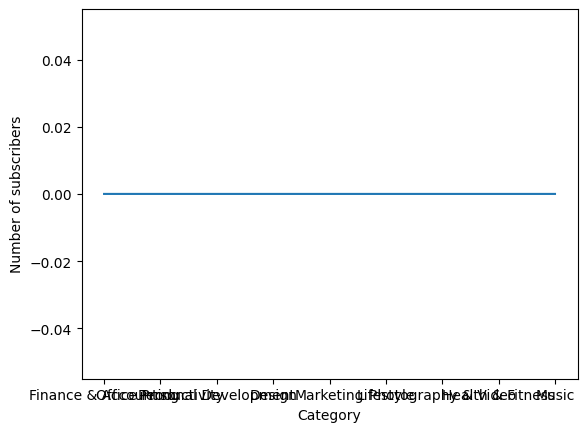

In [99]:
plt.plot(df_min['category'],df_min['num_subscribers'])
plt.ylabel('Number of subscribers')
plt.xlabel('Category')
plt.show()

##### It is clear that 1799 of 98104 courses are not enrolled by any number of subscribers. The number of subscribers is 0 in the case.

## 3. Which of the 4 subjects in this dataset has maximum and minimum enrollments?

In [100]:
df_subjectwise = df_udemy.groupby(['category'],as_index=False)['num_subscribers'].sum()
df_subjectwise = pd.DataFrame(df_subjectwise)
df_subjectwise

,category,num_subscribers
0,Business,71406401
1,Design,40830252
2,Development,164405095
3,Finance & Accounting,27804678
4,Health & Fitness,12001137
5,IT & Software,93264615
6,Lifestyle,10285899
7,Marketing,40131507
8,Music,8373452
9,Office Productivity,25771416


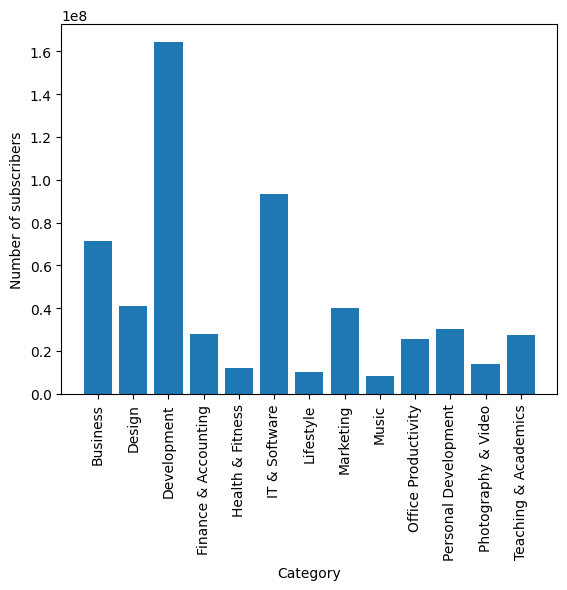

In [101]:
plt.bar(df_subjectwise['category'],df_subjectwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers')
plt.xlabel('Category')
plt.show()

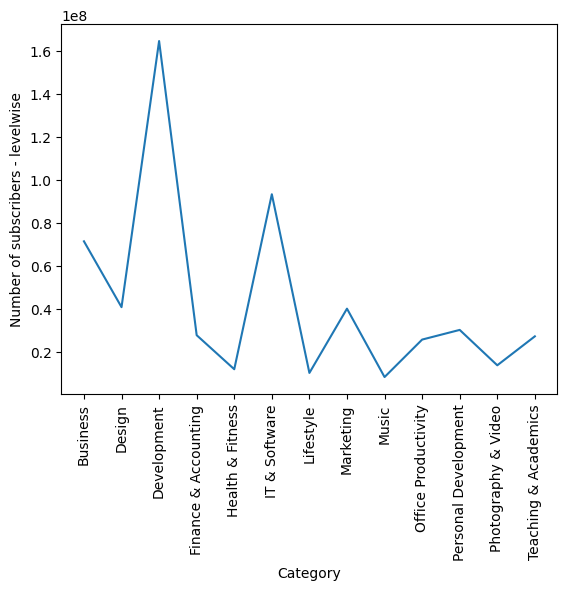

In [102]:
plt.plot(df_subjectwise['category'],df_subjectwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers - levelwise')
plt.xlabel('Category')
plt.show()

In [103]:
ms1 = df_subjectwise['num_subscribers'].max()
ms1

164405095

In [106]:
df_subjectwise[df_subjectwise['num_subscribers']==ms1]

,category,num_subscribers
2,Development,164405095


In [104]:
ms2 = df_subjectwise['num_subscribers'].min()
ms2

8373452

In [105]:
df_subjectwise[df_subjectwise['num_subscribers']==ms2]

,category,num_subscribers
8,Music,8373452


From the above insight, it is clear that "Development" has the most number of subscribers with total of 164405095 subscribers. And, the minimum enrollments are for the subject "Music" which has 8373452 subscribers

## 4. Which level courses has maximum users and minimum users subscribed?


In [108]:
df_levelwise = df_udemy.groupby(['instructional_level'],as_index=False)['num_subscribers'].sum()
df_levelwise = pd.DataFrame(df_levelwise)

In [109]:
df_levelwise

,instructional_level,num_subscribers
0,All Levels,349589951
1,Beginner Level,168814263
2,Expert Level,5128200
3,Intermediate Level,42110907


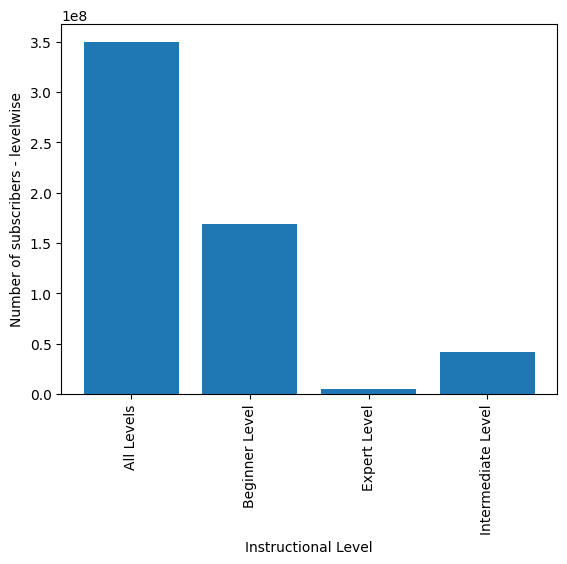

In [110]:
plt.bar(df_levelwise['instructional_level'],df_levelwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers - levelwise')
plt.xlabel('Instructional Level')
plt.show()

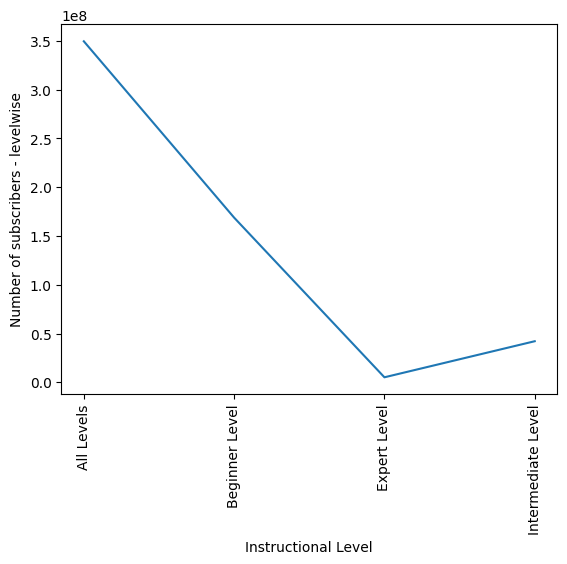

In [111]:
plt.plot(df_levelwise['instructional_level'],df_levelwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers - levelwise')
plt.xlabel('Instructional Level')
plt.show()

In [112]:
ml1 = df_levelwise['num_subscribers'].max()

In [113]:
df_levelwise[df_levelwise['num_subscribers']==ml1]

,instructional_level,num_subscribers
0,All Levels,349589951


In [114]:
ml2 = df_levelwise['num_subscribers'].min()
ml2

5128200

In [115]:
df_levelwise[df_levelwise['num_subscribers']==ml2]

,instructional_level,num_subscribers
2,Expert Level,5128200


##### The maximum users have, thus, subscribed to the "All levels" category courses with 349589951 number of users enrolled.

###### The "Expert level" courses has minimum number of subscribers with 5128200 users enrolled.
